In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
file_path = 'lamborghini.jpg'

img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def resize(image, width = None, height = None, scale = 1):
    if width is None and height is None:
        width, height = image_width_height(image)
    new_width = int(width * scale) if width else None
    new_height = int(height * scale) if height else None
    return cv2.resize(image, (new_width or width, new_height or height))


In [4]:
def get_dimensions(image):
    return image.shape[1], image.shape[0]

In [5]:
def flatten_image(image):
    return image.reshape(-1, image.shape[-1])

In [6]:
def unflatten_image(flattened, width, height):
    return flattened.reshape(height, width, -1)

In [7]:
img = resize(img, width = 800, height = 800)
width, height = get_dimensions(img)

In [8]:
X = flatten_image(img)
print(img.shape, X.shape)

(800, 800, 3) (640000, 3)


# Usando o método do cotovelo para determinar o número de Clusters K

In [10]:
n_clusters = list(range(2, 30 + 1, 1))
kmeans = []
inertias = []

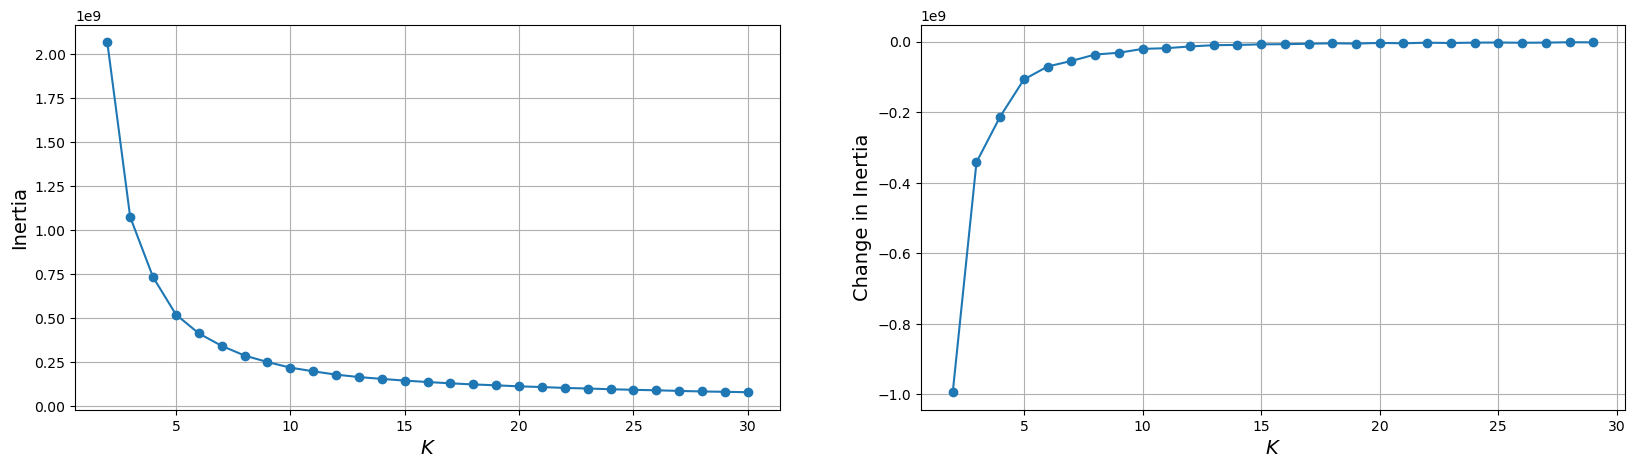

In [11]:
for i in range(len(n_clusters)):  # Alterado de tqdm.trange para range
    kmeans_model = KMeans(n_clusters=n_clusters[i], n_init=10, random_state=42)
    kmeans_model.fit(X)
    kmeans.append(kmeans_model)
    inertias.append(kmeans_model.inertia_)

plt.figure(figsize=[20, 5])

# Primeiro subplot
plt.subplot(1, 2, 1)
plt.plot(n_clusters, inertias, "-o")
plt.xlabel('$K$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(True)

# Segundo subplot
plt.subplot(1, 2, 2)
plt.plot(n_clusters[:-1], np.diff(inertias), "-o")
plt.xlabel('$K$', fontsize=14)
plt.ylabel('Change in Inertia', fontsize=14)
plt.grid(True)

plt.savefig('cotovelo_inercia.png')
plt.show()

# Segmentando a imagem com 6 clusters

In [67]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(X)

C:\Users\joser\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [69]:
X_kmeans = kmeans.cluster_centers_[kmeans.predict(X)]
X_kmeans = X_kmeans.astype("uint8")

In [71]:
img_kmeans = unflatten_image(X_kmeans, width, height)

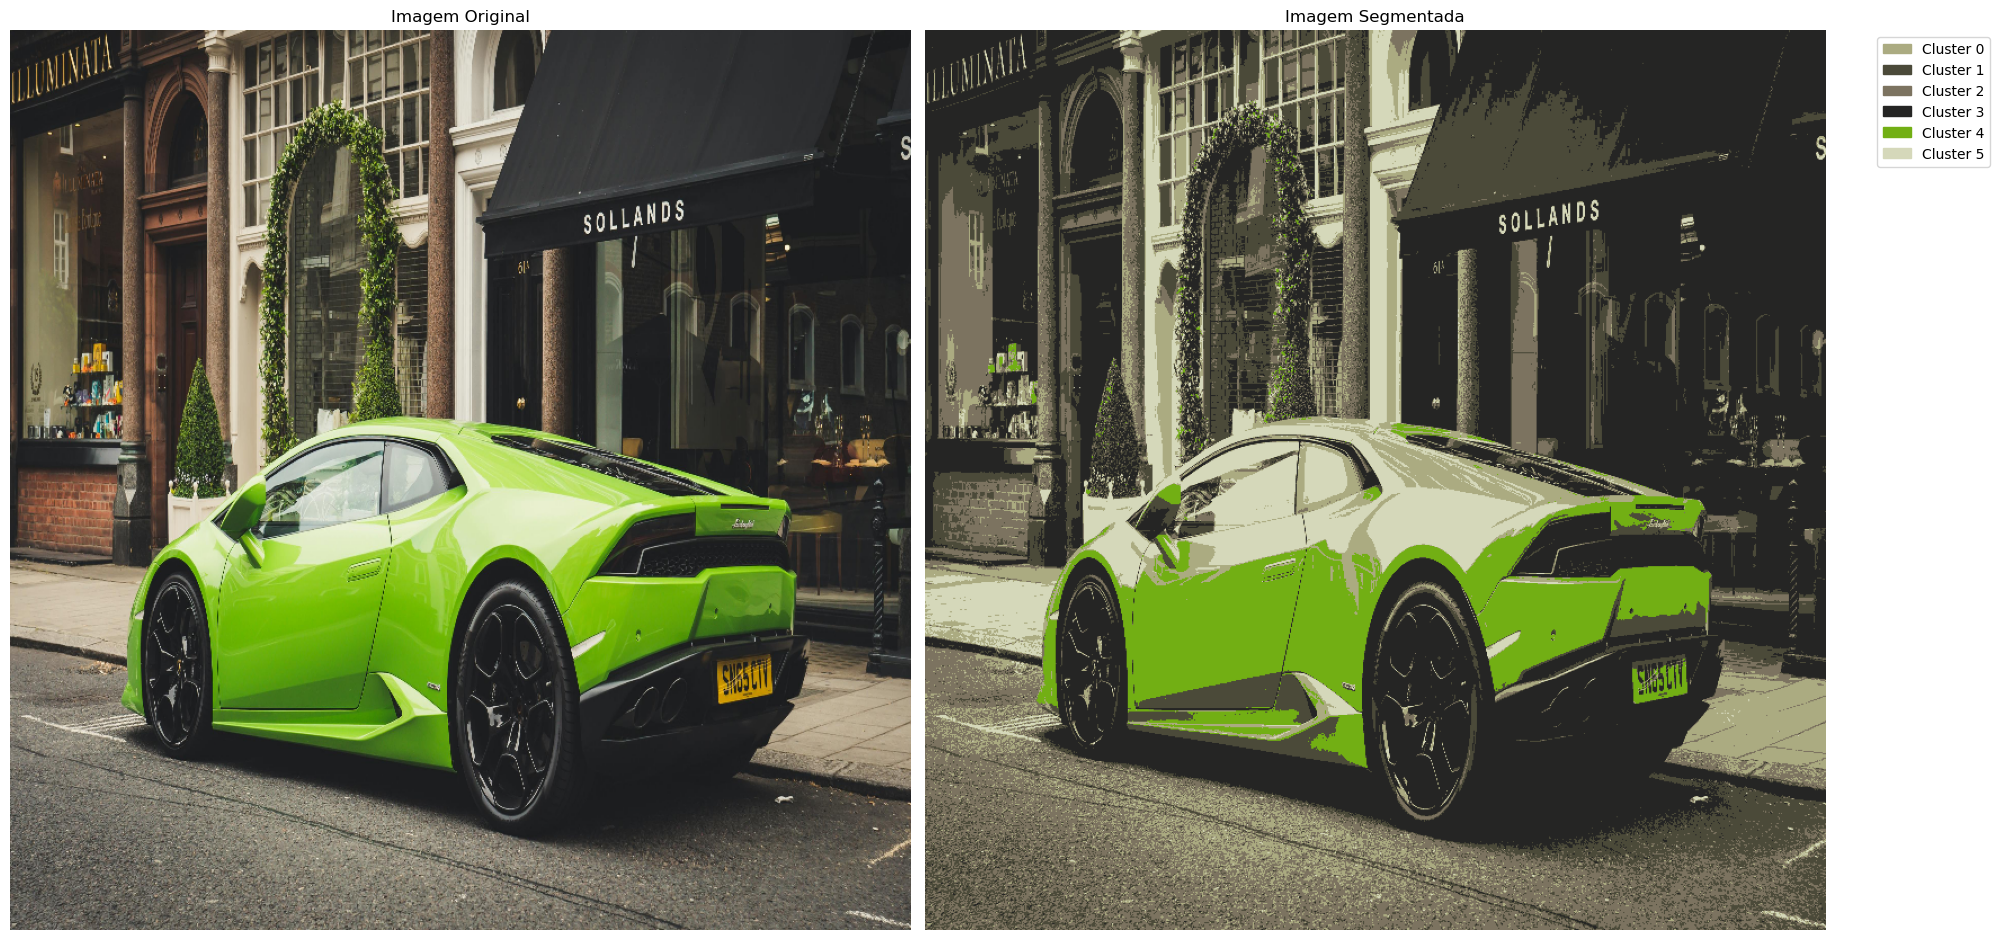

In [73]:
# Após ajustar o modelo kmeans
centros = kmeans.cluster_centers_.astype("uint8")

# Criar uma figura para os subplots
fig, axs = plt.subplots(1, 2, figsize = [20, 10])  # 1 linha, 2 colunas

# Exibir a imagem original no primeiro subplot
axs[0].imshow(img)
axs[0].set_title('Imagem Original')
axs[0].axis('off')  # Desativa os eixos

# Exibir a imagem segmentada no segundo subplot
axs[1].imshow(img_kmeans)
axs[1].set_title('Imagem Segmentada')
axs[1].axis('off')  # Desativa os eixos

# Criar retângulos coloridos para a legenda
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=np.divide(centro, 255), label=f'Cluster {i}') for i, centro in enumerate(centros)]

# Adicionar a legenda ao segundo subplot
axs[1].legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.savefig('comparacao_imagens.png')
plt.show()


# Segmentando a imagem com 10 clusters

In [77]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(X)

C:\Users\joser\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [79]:
X_kmeans = kmeans.cluster_centers_[kmeans.predict(X)]
X_kmeans = X_kmeans.astype("uint8")

In [81]:
img_kmeans = unflatten_image(X_kmeans, width, height)

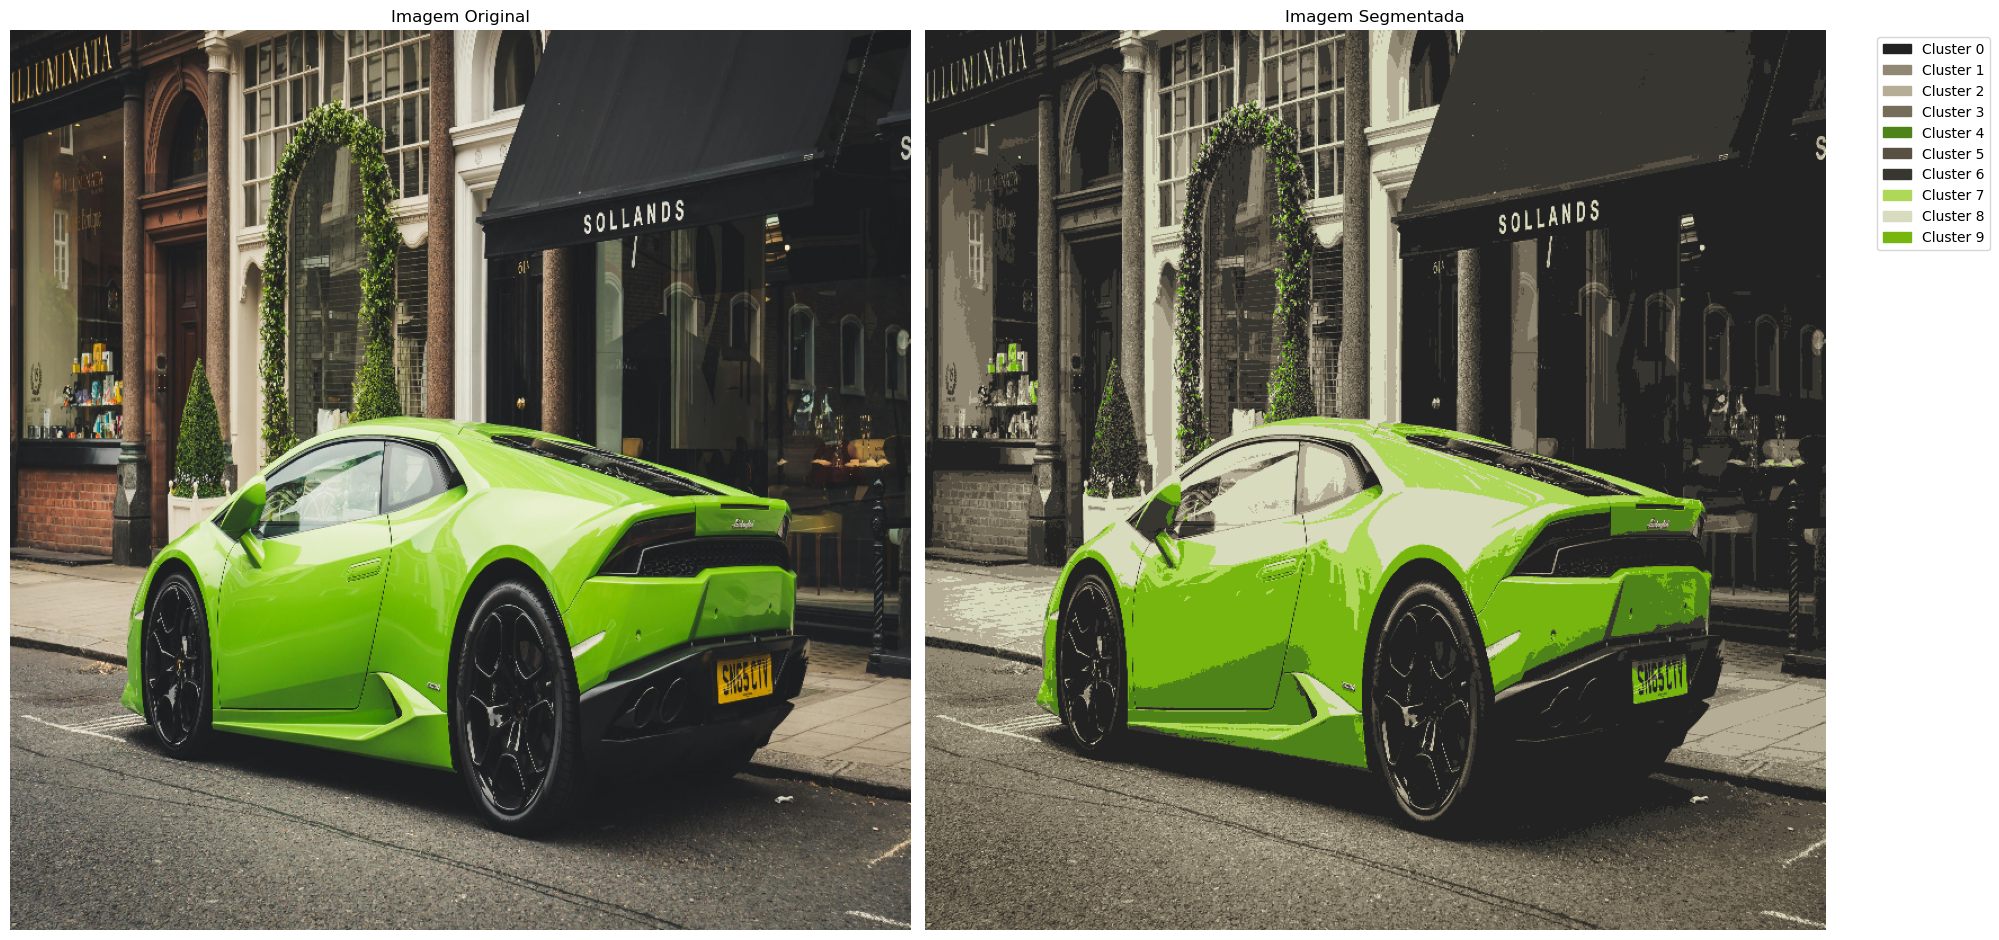

In [83]:
centros = kmeans.cluster_centers_.astype("uint8")

fig, axs = plt.subplots(1, 2, figsize = [20, 10])  # 1 linha, 2 colunas

# Exibir a imagem original no primeiro subplot
axs[0].imshow(img)
axs[0].set_title('Imagem Original')
axs[0].axis('off')  # Desativa os eixos

# Exibir a imagem segmentada no segundo subplot
axs[1].imshow(img_kmeans)
axs[1].set_title('Imagem Segmentada')
axs[1].axis('off')  # Desativa os eixos

# Criar retângulos coloridos para a legenda
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=np.divide(centro, 255), label=f'Cluster {i}') for i, centro in enumerate(centros)]

# Adicionar a legenda ao segundo subplot
axs[1].legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.savefig('comparacao_imagens2.png')
plt.show()